### *Folium maps <u>NOT</u> visible on github*
***

<div style="text-align:center"><span style=font-size:3em;"> Socioeconomic Analysis of Maryland Counties</span></div>

# IBM Applied Data Science Capstone
### IBM Data Science Specialization
#### by Yohann Rousselet

This workbook was completed in partial requirement for completion of the IBM Applied Data Science Capstone, which is Course 9 of 9 in the IBM Data Science Specialization hosted by Coursera.

# Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#method)
* [Results and Discussion](#results)
* [Conclusions](#conclusion)
* [References](#references)

# Introduction <a name="introduction"></a>

![Flag](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a0/Flag_of_Maryland.svg/200px-Flag_of_Maryland.svg.png)

Maryland, the 7th State to join the Union in 1788, is the 19th most populous state in the union [[1](#ref1)]. Part of the Mid-Atlantic region, it has common boarders with 4 states, Virginia, West Virginia, Pennsylvania, and Delaware, as well as the District of Columbia [[2](#ref2)]. While its largest and most well-know city is Baltimore, its capital is Annapolis, located on the Chesapeake Bay at the mouth of the Severn River, roughly 25 miles south of Baltimore [[3](#ref3)].

After finishing graduate school, I was hired by a Maryland-based company, and moved from Southern California to the Greater Baltimore Area. More that five years after moving to Maryland, I remain unfamiliar with this state. Therefore, I have decided that the focus of this project will be the great State of Maryland. More specifically, while Maryland is the richest State as defined by median household income, and second richest territory after Washington D.C. [[4](#ref4)], I am interested in finding out the demographic and wealth distributions, among other data, at a county level, to better understand whether or not every county fares as well as the state level metrics would indicate.    

As mentioned, my approach will be to focus on data at the county level. After pre-processing and exploring the selected datasets, I will use advanced data analytics techniques to gain additional insights into the make-up of the Maryland counties. This project is a great opportunity to demonstrate and further refine my newly acquired Data Science skills while learning something new along the way, and I hope that readers will also be able to deepen their knowledge of the State of Maryland.  

# Data <a name="data"></a>

The State of Maryland, through its Open Data Portal, provides free and unlimited access to geographic and non-geographic datasets for search and exploration. This Portal is managed by the Maryland Department of Information Technology, with contributions from many State and Local agencies [[5](#ref5)]. The majority of the datasets for this project will be obtained from this portal.

As mentioned, the objective is to analyze datasets at the county level, with a focus on demographic and economic measures. To do so, the following datasets will be used:

- Maryland Counties Socioeconomic Characteristics [[6](#ref6)]
- Choose Maryland: Compare Counties - Demographics [[7](#ref7)]
- Choose Maryland: Compare Counties - Quality Of Life [[8](#ref8)]
- Choose Maryland: Compare Counties - Education [[9](#ref9)]
- Choose Maryland: Compare Counties - Workforce [[10](#ref10)]
- Violent Crime & Property Crime by County: 1975 to Present [[11](#ref11)]

Additional, geographical data detailing the characteristics [[12](#ref12)] and the boundaries [[13](#ref13)] of the Maryland counties will be used for data visualization purposes. 

Finally, additional data might be obtained from additional sources as needed. Appropriate references will be included when necessary. No Foursquare location data will be included, as authorizaed by a member of the Coursera Teaching Staff in a recent reply to Discussion Forum post [[14](#ref14)].    
***
*Note 1: In order to simplify the data processing and reduce complexity and compute time requirements, all datasets have be exported to either CSV or GeoJSON formats.*
<br>*Note 2: Most of the available data is current as of 2016; while it would be best to have the most up to date datasets to work with, for the context of this work "mistatched" datasets dates, and 3+ year-old datasets are considered satisfactory* 

### Reference Dataframe Creation

The first step of this process is to create a reference Dataframe which contains select data from the datasets listed above 

#### *Load required libraries*

In [2]:
import pandas as pd
import numpy as np
import types
from botocore.client import Config
import ibm_boto3

#### *Create first Dataframe*

The process of creating the first Dataframe, based on the 'Maryland Counties Socioeconomic Characteristics' dataset will be showed in details; the other Dataframes will be created in one step to keep this code concise.

First, let's load the data

In [3]:
# @hidden_cell
df_socio_econ = pd.read_csv(body)
df_socio_econ.head()

,Jurisdictions,Total Households,Population 25 years and older,Less than 9th Grade,High School no Diploma,High School Diploma,Some College no degree,Associates degree,Bachelor's degree,Graduate or Professional,...,Male,Female,White Alone,Black Alone,Asian Alone,American Indian/Alaska Native Alone,Native Hawaiian/Pacific Islander Alone,Some Other Race Alone,Two or More Races,Hispanic or Latino (of any race)
0,Allegany County,27759,50489,1307,4002,21070,10154,4758,4888,4310,...,37892,34699,64164,5899,594,120,24,210,1580,1257
1,Anne Arundel County,205395,387306,9133,21910,93676,77911,29279,90536,64861,...,279581,285019,417111,91567,20818,1025,408,13095,20576,41275
2,Baltimore County,312859,573263,18315,32698,152622,112480,40355,125363,91430,...,392930,435707,514340,231516,49045,2320,398,8728,22290,42438
3,Calvert County,31462,61269,1096,2716,18833,15552,4642,10564,7866,...,45184,45640,73885,10797,1504,150,34,541,3913,3276
4,Caroline County,11996,22216,1230,2470,9079,4072,1687,2182,1496,...,15971,16814,26338,4376,190,96,18,721,1046,2247


Then let's see how many counties there are in Maryland

In [4]:
print('The number of counties in Maryland is {}'.format(df_socio_econ['Jurisdictions'].shape[0]))

The number of counties in Maryland is 24


We can then see what type of information is available, and decide which data to keep for our analysis

In [5]:
list(df_socio_econ.columns)

['Jurisdictions',
 'Total Households',
 'Population 25 years and older',
 'Less than 9th Grade',
 'High School no Diploma',
 'High School Diploma',
 'Some College no degree',
 'Associates degree',
 "Bachelor's degree",
 'Graduate or Professional',
 'Employment Status of the Population 16 years and over',
 'Civilian Labor Force (16 years & over)',
 'Employed',
 'Unemployed',
 'Unemployment Rate',
 'Commute Workers 16 yrs and over',
 'Percent Drove Alone',
 'Percent Carpooled',
 'Percent Public Transportation',
 'Percent Walked',
 'Percent Other',
 'Percent Worked at Home',
 'Median Household Income ($)',
 'Families',
 'Percent Families in Poverty',
 'Percent Civilian Population w/ Health Ins. Cov.',
 'Total Housing Units',
 'Percent Occupied',
 'Percent Vacant',
 'Total Population',
 'Voting Age Population',
 'Male',
 'Female',
 'White Alone',
 'Black Alone',
 'Asian Alone',
 'American Indian/Alaska Native Alone',
 'Native Hawaiian/Pacific Islander Alone',
 'Some Other Race Alone',
 'Tw

Drop columns that are not of interest for this analysis

In [6]:
df_socio_econ.drop(['Less than 9th Grade', 'High School no Diploma', 'Employment Status of the Population 16 years and over',
                    'Civilian Labor Force (16 years & over)', 'Employed', 'Unemployed', 'Commute Workers 16 yrs and over', 'Percent Drove Alone',
                    'Percent Carpooled', 'Percent Public Transportation', 'Percent Walked', 'Percent Other', 'Percent Worked at Home', 'Families', 
                    'Percent Civilian Population w/ Health Ins. Cov.', 'Total Housing Units', 'Percent Occupied','Male', 'Female', 'White Alone',
                    'Black Alone', 'Asian Alone', 'American Indian/Alaska Native Alone', 'Native Hawaiian/Pacific Islander Alone', 'Some Other Race Alone', 
                    'Two or More Races', 'Hispanic or Latino (of any race)'], axis = 1, inplace = True)
df_socio_econ.head()

,Jurisdictions,Total Households,Population 25 years and older,High School Diploma,Some College no degree,Associates degree,Bachelor's degree,Graduate or Professional,Unemployment Rate,Median Household Income ($),Percent Families in Poverty,Percent Vacant,Total Population,Voting Age Population
0,Allegany County,27759,50489,21070,10154,4758,4888,4310,9.0,42771,10.6,16.0,72591,58846
1,Anne Arundel County,205395,387306,93676,77911,29279,90536,64861,5.2,94502,3.9,6.9,564600,418118
2,Baltimore County,312859,573263,152622,112480,40355,125363,91430,5.5,71810,6.0,7.0,828637,607614
3,Calvert County,31462,61269,18833,15552,4642,10564,7866,7.3,100350,3.3,9.6,90824,68233
4,Caroline County,11996,22216,9079,4072,1687,2182,1496,6.5,52469,12.1,11.6,32785,24049


Then, we process the data

In [7]:
#Move 'Total Population' column to the second column
new_col_pos = df_socio_econ['Total Population']
df_socio_econ.drop(labels=['Total Population'], axis=1,inplace = True)
df_socio_econ.insert(1, 'Total Population', new_col_pos)

#Move 'Voting Age Population' column to the third column
new_col_pos = df_socio_econ['Voting Age Population']
df_socio_econ.drop(labels=['Voting Age Population'], axis=1,inplace = True)
df_socio_econ.insert(2, 'Voting Age Population', new_col_pos)

#Move 'Total Households' column to the tenth column
new_col_pos = df_socio_econ['Total Households']
df_socio_econ.drop(labels=['Total Households'], axis=1,inplace = True)
df_socio_econ.insert(9, 'Total Households', new_col_pos)

#Replace diploma and degree absolute data by percentage of population 25 years and older
df_socio_econ['High School Diploma'] = round(100*((df_socio_econ['High School Diploma']+df_socio_econ['Some College no degree']
                                                   +df_socio_econ['Associates degree']+df_socio_econ["Bachelor's degree"]+
                                                   df_socio_econ['Graduate or Professional'])/df_socio_econ['Population 25 years and older']),1)
df_socio_econ['Associates degree'] = round(100*((df_socio_econ['Associates degree']+df_socio_econ["Bachelor's degree"]+
                                                   df_socio_econ['Graduate or Professional'])/df_socio_econ['Population 25 years and older']),1)
df_socio_econ["Bachelor's degree"] = round(100*((df_socio_econ["Bachelor's degree"]+df_socio_econ['Graduate or Professional'])/df_socio_econ['Population 25 years and older']),1)
df_socio_econ['Graduate or Professional'] = round(100*(df_socio_econ['Graduate or Professional']/df_socio_econ['Population 25 years and older']),1)

#Replace 'Voting Age Population' and 'Population 25 years and older' by percentage of total population
df_socio_econ['Voting Age Population'] = round(100*(df_socio_econ['Voting Age Population']/df_socio_econ['Total Population']),1)
df_socio_econ['Population 25 years and older'] = round(100*(df_socio_econ['Population 25 years and older']/df_socio_econ['Total Population']),1)

#Drop 'Some College no degree' column
df_socio_econ.drop(['Some College no degree'], axis = 1, inplace = True)

#Rename select columns
df_socio_econ = df_socio_econ.rename(columns={"Voting Age Population": "Percent of Total Population of Voting Age", 
                                              "Population 25 years and older": "Percent of Total Population 25 Years and Older",
                                              "High School Diploma": "Percent of Population 25 Years and Older with High School Diploma",
                                              "Associates degree": "Percent of Population 25 Years and Older with Associates degree",
                                              "Bachelor's degree": "Percent of Population 25 Years and Older with Bachelor's degree", 
                                              "Graduate or Professional": "Percent of Population 25 Years and Older with Graduate or Professional degree", 
                                              "Percent Vacant": "Percent of Vacant Housing Units"})

#Replace Jurisdiction name
df_socio_econ.loc[df_socio_econ['Jurisdictions']=='Baltimore city', 'Jurisdictions'] = 'Baltimore City'

#Sort by ascending Jurisdication names
df_socio_econ=df_socio_econ.sort_values(by=['Jurisdictions'])
df_socio_econ.reset_index(drop=True, inplace = True)
df_socio_econ.head()

,Jurisdictions,Total Population,Percent of Total Population of Voting Age,Percent of Total Population 25 Years and Older,Percent of Population 25 Years and Older with High School Diploma,Percent of Population 25 Years and Older with Associates degree,Percent of Population 25 Years and Older with Bachelor's degree,Percent of Population 25 Years and Older with Graduate or Professional degree,Total Households,Unemployment Rate,Median Household Income ($),Percent Families in Poverty,Percent of Vacant Housing Units
0,Allegany County,72591,81.1,69.6,89.5,27.6,18.2,8.5,27759,9.0,42771,10.6,16.0
1,Anne Arundel County,564600,74.1,68.6,92.0,47.7,40.1,16.7,205395,5.2,94502,3.9,6.9
2,Baltimore City,619796,74.6,68.6,84.2,35.1,30.4,14.5,239791,10.0,46641,17.2,18.7
3,Baltimore County,828637,73.3,69.2,91.1,44.9,37.8,15.9,312859,5.5,71810,6.0,7.0
4,Calvert County,90824,75.1,67.5,93.8,37.7,30.1,12.8,31462,7.3,100350,3.3,9.6


#### *Create Additional Dataframes*

As discussed, additional data frames will be created from the available data, but we will not detail this process

<u>Education Data</u>

In [8]:
#Load Education Data
df_education = pd.read_csv(body)

#Process Education Data

#Drop Metadata
df_education.drop([24,25,26,27], inplace = True)

#Drop unwanted columns
df_education = df_education.filter(['County', 'Number of 2-Year Colleges', 'Number of 4-Year Colleges and Universities'])

#Rename 'County' column
df_education = df_education.rename(columns={'County': 'Jurisdictions'})

#Sort by ascending Jurisdication names
df_education = df_education.sort_values(by=['Jurisdictions'])
df_education.reset_index(drop=True, inplace = True)
df_education.head()

,Jurisdictions,Number of 2-Year Colleges,Number of 4-Year Colleges and Universities
0,Allegany County,1,1
1,Anne Arundel County,1,2
2,Baltimore City,1,11
3,Baltimore County,1,7
4,Calvert County,0,0


<u>Demographics Data</u>

In [9]:
#Load Demographics Data
df_demographics = pd.read_csv(body)

#Process Demographics Data

#Drop Metadata
df_demographics.drop([24,25,26,27], inplace = True)

#Drop unwanted columns
df_demographics = df_demographics.filter(['County', 'Total Population, 2018', 'Median Age','Median Household Income ($ Dollars)'])

#Rename 'County' column
df_demographics = df_demographics.rename(columns={'County': 'Jurisdictions'})

#Sort by ascending Jurisdication names
df_demographics = df_demographics.sort_values(by=['Jurisdictions'])
df_demographics.reset_index(drop=True, inplace = True)
df_demographics.head()

,Jurisdictions,"Total Population, 2018",Median Age,Median Household Income ($ Dollars)
0,Allegany County,70975,41.4,43535
1,Anne Arundel County,576031,38.4,97051
2,Baltimore City,602495,35.6,50501
3,Baltimore County,828431,39.5,75836
4,Calvert County,92003,40.5,106270


<u>Workforce Data</u>

In [10]:
#Load Workforce Data
df_workforce = pd.read_csv(body)

#Process Workforce Data

#Drop Metadata
df_workforce.drop([24,25,26,27], inplace = True)

#Drop unwanted columns
df_workforce = df_workforce.filter(['County', 'Unemployment Rate (%)', 'Number of Business Establishments', 'Number of Business Establishments with 100 or More Workers'])

#Rename 'County' column
df_workforce = df_workforce.rename(columns={'County': 'Jurisdictions'})

#Sort by ascending Jurisdication names
df_workforce = df_workforce.sort_values(by=['Jurisdictions'])
df_workforce.reset_index(drop=True, inplace = True)
df_workforce.head()

,Jurisdictions,Unemployment Rate (%),Number of Business Establishments,Number of Business Establishments with 100 or More Workers
0,Allegany County,5.5,1491,25
1,Anne Arundel County,3.3,14972,386
2,Baltimore City,5.7,13275,395
3,Baltimore County,4,20990,564
4,Calvert County,3.5,1802,20


<u>Quality of Life Data</u>

In [11]:
#Load Quality of Life Data
df_quality = pd.read_csv(body)

#Process Quality of Life Data

#Drop Metadata
df_quality.drop([24,25,26,27], inplace = True)

#Drop unwanted columns
df_quality = df_quality.filter(['County', 'Cost of Living Index', 'Median Sale Price of a Home ($ Dollars)','Number of Housing Units Sold'])

#Rename 'County' column
df_quality = df_quality.rename(columns={'County': 'Jurisdictions'})

#Sort by ascending Jurisdication names
df_quality = df_quality.sort_values(by=['Jurisdictions'])
df_quality.reset_index(drop=True, inplace = True)
df_quality.head()

,Jurisdictions,Cost of Living Index,Median Sale Price of a Home ($ Dollars),Number of Housing Units Sold
0,Allegany County,84.9,90829,624
1,Anne Arundel County,119.6,338287,8619
2,Baltimore City,101.3,139723,8450
3,Baltimore County,109.9,238426,9986
4,Calvert County,121.7,318471,1576


<u>Crime Data</u>

In [12]:
#Load Crime Data
df_crime = pd.read_csv(body)

#Process Crime Data

#Drop old data
df_crime = df_crime[df_crime['YEAR']==2017]

#Drop unwanted columns
df_crime = df_crime.filter(['JURISDICTION', 'OVERALL CRIME RATE PER 100,000 PEOPLE'])

#Rename columns
df_crime = df_crime.rename(columns={'JURISDICTION': 'Jurisdictions', 'OVERALL CRIME RATE PER 100,000 PEOPLE': 'Crime Rate per 100,000 People'})

#Sort by ascending Jurisdication names
df_crime = df_crime.sort_values(by=['Jurisdictions'])
df_crime.reset_index(drop=True, inplace = True)
df_crime.head()

,Jurisdictions,"Crime Rate per 100,000 People"
0,Allegany County,3467.1
1,Anne Arundel County,2450.1
2,Baltimore City,7033.7
3,Baltimore County,3402.1
4,Calvert County,1155.2


<u>County Seats and Miscellaneous County Data</u>

In [13]:
#Load County Seats and Miscellaneous County Data
df_seats_misc = pd.read_html("https://en.wikipedia.org/wiki/List_of_counties_in_Maryland")[1]

#Process County Seats and Miscellaneous County

#Drop unwanted columns
df_seats_misc = df_seats_misc.filter(['County', 'County seat[2][6]', 'Area[6][8]'])

#Drop unwanted area data
df_seats_misc['Area[6][8]'] = df_seats_misc['Area[6][8]'].str.split('s').str[0]

#Rename columns
df_seats_misc = df_seats_misc.rename(columns={'County': 'Jurisdictions', 'County seat[2][6]': 'County Seat', 'Area[6][8]': 'Area (Square Miles)'})

#Sort by ascending Jurisdication names
df_seats_misc = df_seats_misc.sort_values(by=['Jurisdictions'])
df_seats_misc.reset_index(drop=True, inplace = True)
df_seats_misc.head()

,Jurisdictions,County Seat,Area (Square Miles)
0,Allegany County,Cumberland,430
1,Anne Arundel County,Annapolis,588
2,Baltimore City,Baltimore City,92
3,Baltimore County,Towson,682
4,Calvert County,Prince Frederick,345


Before consolidating the Dataframes, let's add the geographical coordinates for the County Seats, using the geopy package

In [14]:
#Import necessary library
from geopy.geocoders import Nominatim

#Create function to find coordinates for given postal code
def geoloc(seat):
    
    #Define address
    address = '{}, Maryland'.format(seat)

    #Find coordinates for the address
    geolocator = Nominatim(user_agent='Maryland_County_Seats')
    location = geolocator.geocode(address)
    CTY_lat = location.latitude
    CTY_long = location.longitude
    
    return CTY_lat, CTY_long

#loop through all County Seats to find coordinates and populate County Seats dataframe
df_seats_misc['Latitude'], df_seats_misc['Longitude'] = zip(*df_seats_misc['County Seat'].apply(geoloc))
df_seats_misc.head()

,Jurisdictions,County Seat,Area (Square Miles),Latitude,Longitude
0,Allegany County,Cumberland,430,39.652650,-78.762383
1,Anne Arundel County,Annapolis,588,38.978640,-76.492786
2,Baltimore City,Baltimore City,92,39.290882,-76.610759
3,Baltimore County,Towson,682,39.401855,-76.602388
4,Calvert County,Prince Frederick,345,38.540554,-76.583507


#### *Merge Dataframes*

In [15]:
# @hidden_cell

#Import necessary library
from functools import reduce

#Compile list of Dataframes to be merged
data_frames = [df_socio_econ, df_education, df_demographics, df_workforce, df_quality, df_crime, df_seats_misc]

#Merge Dataframes
df_complete_md = reduce(lambda  left,right: pd.merge(left,right,how='inner', on='Jurisdictions', sort=False), data_frames)
df_complete_md.head(30)

project.save_data('complete_md.csv', df_complete_md.to_csv(index=False), overwrite=True)

{'file_name': 'complete_md.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'courseracapstone-donotdelete-pr-wwxknnjptjzhai',
 'asset_id': '22304dcd-e979-4bf2-a7f9-a56e31dfd95b'}

We can then see what type of information is available, and decide which data to keep for our analysis

In [16]:
list(df_complete_md)

['Jurisdictions',
 'Total Population',
 'Percent of Total Population of Voting Age',
 'Percent of Total Population 25 Years and Older',
 'Percent of Population 25 Years and Older with High School Diploma',
 'Percent of Population 25 Years and Older with Associates degree',
 "Percent of Population 25 Years and Older with Bachelor's degree",
 'Percent of Population 25 Years and Older with Graduate or Professional degree',
 'Total Households',
 'Unemployment Rate',
 'Median Household Income ($)',
 'Percent Families in Poverty',
 'Percent of Vacant Housing Units',
 'Number of 2-Year Colleges',
 'Number of 4-Year Colleges and Universities',
 'Total Population, 2018',
 'Median Age',
 'Median Household Income ($ Dollars)',
 'Unemployment Rate (%)',
 'Number of Business Establishments',
 'Number of Business Establishments with 100 or More Workers',
 'Cost of Living Index',
 'Median Sale Price of a Home ($ Dollars)',
 'Number of Housing Units Sold',
 'Crime Rate per 100,000 People',
 'County Se

Drop columns that are duplicate, prioritization more recent datasets

In [17]:
df_complete_md.drop(['Total Population', 'Unemployment Rate', 'Median Household Income ($)'], axis = 1, inplace = True)
df_complete_md.head()

,Jurisdictions,Percent of Total Population of Voting Age,Percent of Total Population 25 Years and Older,Percent of Population 25 Years and Older with High School Diploma,Percent of Population 25 Years and Older with Associates degree,Percent of Population 25 Years and Older with Bachelor's degree,Percent of Population 25 Years and Older with Graduate or Professional degree,Total Households,Percent Families in Poverty,Percent of Vacant Housing Units,...,Number of Business Establishments,Number of Business Establishments with 100 or More Workers,Cost of Living Index,Median Sale Price of a Home ($ Dollars),Number of Housing Units Sold,"Crime Rate per 100,000 People",County Seat,Area (Square Miles),Latitude,Longitude
0,Allegany County,81.1,69.6,89.5,27.6,18.2,8.5,27759,10.6,16.0,...,1491,25,84.9,90829,624,3467.1,Cumberland,430,39.652650,-78.762383
1,Anne Arundel County,74.1,68.6,92.0,47.7,40.1,16.7,205395,3.9,6.9,...,14972,386,119.6,338287,8619,2450.1,Annapolis,588,38.978640,-76.492786
2,Baltimore City,74.6,68.6,84.2,35.1,30.4,14.5,239791,17.2,18.7,...,13275,395,101.3,139723,8450,7033.7,Baltimore City,92,39.290882,-76.610759
3,Baltimore County,73.3,69.2,91.1,44.9,37.8,15.9,312859,6.0,7.0,...,20990,564,109.9,238426,9986,3402.1,Towson,682,39.401855,-76.602388
4,Calvert County,75.1,67.5,93.8,37.7,30.1,12.8,31462,3.3,9.6,...,1802,20,121.7,318471,1576,1155.2,Prince Frederick,345,38.540554,-76.583507


Finally, let's process the data one last time to get the final Dataframe. This dataset is deemed too large for this analyis, and needs to be fruther simplified. Therefore some new metrics will be created, and columns will be dropped.

In [18]:
#Create new degree/diplomas metrics  
df_complete_md['Population 25 years and older without a High School Diploma (%)'] = (100 - df_complete_md['Percent of Population 25 Years and Older with High School Diploma'])
                                        
df_complete_md["Population 25 years and older with Bachelor's Degree or Higher (%)"] = df_complete_md["Percent of Population 25 Years and Older with Bachelor's degree"]

#Create college/university metrics
df_total_unis = (df_complete_md['Number of 2-Year Colleges'].astype(str).astype(int)+df_complete_md['Number of 4-Year Colleges and Universities'].astype(str).astype(int))
df_total_voting_pop = 0.01*((df_complete_md['Total Population, 2018'].astype(str).astype(float))*df_complete_md['Percent of Total Population of Voting Age'])
df_complete_md['Number of 2 and 4-Year Colleges and Universities per 100,000 People of Voting Age'] = round(100000*df_total_unis/df_total_voting_pop,1)

#Drop uncessary degree/diplomas columns
df_complete_md.drop(['Percent of Population 25 Years and Older with High School Diploma', 'Percent of Population 25 Years and Older with Associates degree', 
                     "Percent of Population 25 Years and Older with Bachelor's degree", 'Percent of Population 25 Years and Older with Graduate or Professional degree'], 
                     axis = 1, inplace = True)

#Drop uncessary population columns
df_complete_md.drop(['Percent of Total Population of Voting Age', 'Percent of Total Population 25 Years and Older'], axis = 1, inplace = True)

#Create new housing metrics
df_complete_md['Number of Housing Units Sold per 100000 Households'] = round(100000*df_complete_md['Number of Housing Units Sold'].astype(str).astype(float)/
                                                                             df_complete_md['Total Households'].astype(str).astype(float),1)
df_complete_md['Ratio of Median Housing Unit Sales Price to Median Household Income'] = round(df_complete_md['Median Sale Price of a Home ($ Dollars)'].astype(str).astype(float)/
                                                                             df_complete_md['Median Household Income ($ Dollars)'].astype(str).astype(float),1)

#Drop uncessary housing column
df_complete_md.drop(['Number of Housing Units Sold'], axis = 1, inplace = True)

#Create new business metrics
df_complete_md['Number of Business Establishments per 100,000 People of Voting Age'] = round(100000*df_complete_md['Number of Business Establishments'].astype(str).astype(float)/
                                                                                             df_total_voting_pop,1)
df_complete_md['Number of Business Establishments with 100 or More Workers per 100,000 People of Voting Age'] = round(100000*df_complete_md['Number of Business Establishments with 100 or More Workers'].astype(str).astype(float)/
                                                                                                                      df_total_voting_pop,1)
#Drop uncessary business column
df_complete_md.drop(['Number of Business Establishments', 'Number of Business Establishments with 100 or More Workers'], axis = 1, inplace = True)

#Create population density metric
df_complete_md['Population Density (People per Square Mile)'] = round(df_complete_md['Total Population, 2018'].astype(str).astype(float)/
                                                                      df_complete_md['Area (Square Miles)'].astype(str).astype(float))

#Reorganize columns
df_complete_md = df_complete_md[['Jurisdictions', 'County Seat', 'Area (Square Miles)', 'Latitude', 'Longitude', 'Total Population, 2018', 'Population Density (People per Square Mile)', 
                                 'Total Households', 'Median Age', 'Median Household Income ($ Dollars)', 'Number of 2 and 4-Year Colleges and Universities per 100,000 People of Voting Age', 
                                 'Population 25 years and older without a High School Diploma (%)', "Population 25 years and older with Bachelor's Degree or Higher (%)", 
                                 'Median Sale Price of a Home ($ Dollars)', 'Ratio of Median Housing Unit Sales Price to Median Household Income', 
                                 'Number of Housing Units Sold per 100000 Households', 'Number of Business Establishments per 100,000 People of Voting Age', 
                                 'Number of Business Establishments with 100 or More Workers per 100,000 People of Voting Age', 'Unemployment Rate (%)', 'Cost of Living Index', 'Percent Families in Poverty', 'Percent of Vacant Housing Units', 'Crime Rate per 100,000 People']]

#Convert select columns to float
cols_to_float = df_complete_md[['Total Population, 2018', 'Population Density (People per Square Mile)', 'Total Households', 'Median Age', 
                                'Median Household Income ($ Dollars)', 'Number of 2 and 4-Year Colleges and Universities per 100,000 People of Voting Age', 
                                'Population 25 years and older without a High School Diploma (%)', "Population 25 years and older with Bachelor's Degree or Higher (%)", 
                                'Median Sale Price of a Home ($ Dollars)', 'Ratio of Median Housing Unit Sales Price to Median Household Income', 
                                'Number of Housing Units Sold per 100000 Households', 'Number of Business Establishments per 100,000 People of Voting Age', 
                                'Number of Business Establishments with 100 or More Workers per 100,000 People of Voting Age', 'Unemployment Rate (%)', 'Cost of Living Index', 
                                'Percent Families in Poverty', 'Percent of Vacant Housing Units', 'Crime Rate per 100,000 People']].astype(str).astype(float)

df_complete_md[['Total Population, 2018', 'Population Density (People per Square Mile)', 'Total Households', 'Median Age', 
                'Median Household Income ($ Dollars)', 
                'Number of 2 and 4-Year Colleges and Universities per 100,000 People of Voting Age', 
                'Population 25 years and older without a High School Diploma (%)', "Population 25 years and older with Bachelor's Degree or Higher (%)", 
                'Median Sale Price of a Home ($ Dollars)', 'Ratio of Median Housing Unit Sales Price to Median Household Income', 
                'Number of Housing Units Sold per 100000 Households', 'Number of Business Establishments per 100,000 People of Voting Age', 
                'Number of Business Establishments with 100 or More Workers per 100,000 People of Voting Age', 
                'Unemployment Rate (%)', 'Cost of Living Index', 'Percent Families in Poverty', 'Percent of Vacant Housing Units', 
                'Crime Rate per 100,000 People']] = cols_to_float

df_complete_md['Area (Square Miles)'] = df_complete_md['Area (Square Miles)'].astype(str).astype(float)

#Rename select columns
df_complete_md = df_complete_md.rename(columns={"Total Population, 2018": "Total Population", "Median Age": "Median Age (Years)", 
                                                "Median Household Income ($ Dollars)": "Median Household Income ($)",
                                                "Median Sale Price of a Home ($ Dollars)": "Median Sale Price of a Home ($)", 
                                                "Percent Families in Poverty": "Percentage of Families Living in Poverty",
                                                "Percent of Vacant Housing Units": "Percentage of Housing Units that are Vacant"})

df_complete_md.head()

,Jurisdictions,County Seat,Area (Square Miles),Latitude,Longitude,Total Population,Population Density (People per Square Mile),Total Households,Median Age (Years),Median Household Income ($),...,Median Sale Price of a Home ($),Ratio of Median Housing Unit Sales Price to Median Household Income,Number of Housing Units Sold per 100000 Households,"Number of Business Establishments per 100,000 People of Voting Age","Number of Business Establishments with 100 or More Workers per 100,000 People of Voting Age",Unemployment Rate (%),Cost of Living Index,Percentage of Families Living in Poverty,Percentage of Housing Units that are Vacant,"Crime Rate per 100,000 People"
0,Allegany County,Cumberland,430.0,39.652650,-78.762383,70975.0,165.0,27759.0,41.4,43535.0,...,90829.0,2.1,2247.9,2590.3,43.4,5.5,84.9,10.6,16.0,3467.1
1,Anne Arundel County,Annapolis,588.0,38.978640,-76.492786,576031.0,980.0,205395.0,38.4,97051.0,...,338287.0,3.5,4196.3,3507.6,90.4,3.3,119.6,3.9,6.9,2450.1
2,Baltimore City,Baltimore City,92.0,39.290882,-76.610759,602495.0,6549.0,239791.0,35.6,50501.0,...,139723.0,2.8,3523.9,2953.5,87.9,5.7,101.3,17.2,18.7,7033.7
3,Baltimore County,Towson,682.0,39.401855,-76.602388,828431.0,1215.0,312859.0,39.5,75836.0,...,238426.0,3.1,3191.9,3456.6,92.9,4.0,109.9,6.0,7.0,3402.1
4,Calvert County,Prince Frederick,345.0,38.540554,-76.583507,92003.0,267.0,31462.0,40.5,106270.0,...,318471.0,3.0,5009.2,2608.0,28.9,3.5,121.7,3.3,9.6,1155.2


In [19]:
print('The final Dataframe has {} rows (1 per county), and {} columns'.format(df_complete_md.shape[0], df_complete_md.shape[1]))

The final Dataframe has 24 rows (1 per county), and 23 columns


The data gathering stage of this work is now complete. This data will be used in the next steps of this analysis, to gain more insights on the make-up of the 24 counties in Maryland.

# Methodology <a name="method"></a>

As discussed in the introduction, the purpose of this work is to study the make-up of the various counties in Maryland, and to gain more insights into how similar and/or different fromeach other. Now that we have collected geographical, socio-economic and demographics data about the 24 Maryland counties, and compiled it into a reference Dataframe, we will perform basic exploratory anslyis to gain some high level information about the counties, mostly using cartographical visualizations. To do so, we will use the following packages/libraries:

- Geopy to find geographical coordinates 
- Folium to generate maps
- Seaborn and Matplotlib to plot data

Finally, we will cluster the counties using a subset of the available data, to find which counties are similar to each others, and which are not. To do so will use the scikit-learn Machine Learning library, and more specifically the k-means clustering algorithm. Detailed data for each cluster will then be used to understand their main characteristics. Hopefully, these clusters will provide enough insights into the data which can be used as a starting point to further ones understand of the similarities and differences between each county, and possibly inform relocation of investment decisions for prospective buyers/investors.

### Exploratory Data Analysis

First, let's create a map of Maryland with markers representing the council seats, using the Folium package for generating the map, and geopy to obtain geographical coordinates 

In [20]:
#Install and import necessary libraries
!pip -q install folium
import folium
import json
from pandas.io.json import json_normalize

#Create map of Maryland the latitude and longitude of Fairfax, Va values as centerpoint
geolocator = Nominatim(user_agent='Maryland_Geo_Center')
location = geolocator.geocode('Fairfax, Virginia')
CENTER_lat = location.latitude
CENTER_long = location.longitude

map_maryland = folium.Map(width=1000,height=650, location=[CENTER_lat, CENTER_long], tiles='cartodbpositron', zoom_start=8)

#Add markers to map
for lat, lng, county, seat in zip(df_complete_md['Latitude'], df_complete_md['Longitude'], df_complete_md['Jurisdictions'], df_complete_md['County Seat']):
    label = '{}, {}'.format(seat, county)
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
        [lat, lng],
        popup=label,
        tooltip = "Click for more",
        icon=folium.Icon(color='blue'),
        parse_html=False).add_to(map_maryland)  

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_1 = client_e537024ca2384e43a7086e73398ff0e5.get_object(Bucket='courseracapstone-donotdelete-pr-wwxknnjptjzhai', Key='MDCnts.geojson')['Body']
# add missing __iter__ method so pandas accepts body as file-like object
if not hasattr(streaming_body_1, "__iter__"): streaming_body_1.__iter__ = types.MethodType( __iter__, streaming_body_1 ) 

county_geojson = json.load(streaming_body_1)    

style = {'fillColor': '#B2B2B2', 'color': '#B2B2B2', 'weight': 1}

folium.GeoJson(
    county_geojson,
    name='County Limits',
    style_function=lambda x: style).add_to(map_maryland)

folium.LayerControl().add_to(map_maryland)    
    
map_maryland

To get a better understanding of the population centers, we can generate a Choropleth map with the counties shaded in colors as a function of total population. Markers will be added to provide additional information.

In [21]:
#import necessary libraries
import copy

#Append GeoJSON file to add some additional parameters
county_geojson_plus = copy.deepcopy(county_geojson)

for i in range(len(df_complete_md)):
    County = df_complete_md['Jurisdictions'][i]
    County_Seat = df_complete_md['County Seat'][i]
    County_Pop = df_complete_md['Total Population'][i]
    County_Area = df_complete_md['Area (Square Miles)'][i]
    County_Age = df_complete_md['Median Age (Years)'][i]
    County_Income = df_complete_md['Median Household Income ($)'][i]
    
    for k in range(len(df_complete_md)): 
        if county_geojson_plus['features'][k]['properties']['geodesc'] == County: 
            county_geojson_plus['features'][k]['properties']['seat'] = County_Seat
            county_geojson_plus['features'][k]['properties']['pop'] = County_Pop
            county_geojson_plus['features'][k]['properties']['area'] = County_Area
            county_geojson_plus['features'][k]['properties']['age'] = County_Age
            county_geojson_plus['features'][k]['properties']['income'] = County_Income       
                  
#Create Map
map_maryland_pop = folium.Map(width=1000,height=650, location=[CENTER_lat, CENTER_long], tiles='cartodbpositron', zoom_start=8)

#Add markers to map
for lat, lng, county, seat in zip(df_complete_md['Latitude'], df_complete_md['Longitude'], df_complete_md['Jurisdictions'], df_complete_md['County Seat']): 
   
    folium.Marker(
        [lat, lng],
        popup=False,
        tooltip = '{}'.format(seat),
        icon=folium.Icon(color='blue'),
        parse_html=False).add_to(map_maryland_pop)  
    
#Create bins for Chloropleth map legend    
bins = [0, 100000, 300000, 500000, 800000, 1100000]

#Create Chloropleth map
County_Pop = folium.Choropleth(geo_data=county_geojson_plus,
                               name='Population',
                               data=df_complete_md, 
                               columns=['Jurisdictions', 'Total Population'],
                               key_on='feature.properties.geodesc', 
                               fill_color='Oranges', 
                               fill_opacity=0.7, 
                               line_opacity=0.2,
                               bins = bins,
                               legend_name='Total Population') #.add_to(map_maryland_pop)

style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
County_Data = folium.features.GeoJson(
    county_geojson_plus,
    style_function=style_function, 
    name='County Limits',
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['geodesc','seat','pop','area','age', 'income'],
        aliases=['County: ', 'County Seat: ', 'Total Population: ', 'Area (Square Miles): ', 'Median Age (Years): ', 'Median Household Income ($): '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
County_Pop.add_to(map_maryland_pop)
map_maryland_pop.add_child(County_Data)

folium.LayerControl().add_to(map_maryland_pop)

map_maryland_pop

This plot shows that there are two major population centers in Maryland, Baltimore City and its suburbs, and the suburban area north and east of Washington DC. The remaining counties are sparsely populated.

A good starting point for explorating the data is evaluate the correlation between each parameter. To do so, we can use the Pearson Correlation Coefficient, and heat maps to visualize the results. County and county seat names, longitude and latitude, and absolute population and area metrics are removed to simplify/shrink the dataset.  

In [22]:
#Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Create reduced dataset and 
pearsoncorr_complete_md = df_complete_md.drop(['Jurisdictions', 'Total Population', 'Total Households', 'Area (Square Miles)', 'Latitude', 'Longitude'],1).corr(method='pearson')

#Plot heatmap
mask = np.zeros_like(pearsoncorr_complete_md)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15, 10))
plt.yticks(rotation=0)
sns.heatmap(pearsoncorr_complete_md, 
            mask=mask,
            xticklabels=pearsoncorr_complete_md.columns,
            yticklabels=pearsoncorr_complete_md.columns,
            cmap='RdBu',
            square= True,
            annot=True,
            linewidth=0.5)

From this plot we can easily identify "pockets" of highly correlated parameters, such as education/employement metrics, wealth/housing metrics, and poverty/employment/crime metrics. We can use these insights to create reduced datasets to further explore the data.

We will create 4 "reduced" datasets:
- General
- Education and Employment
- Housing
- Hardship

<u>General</u>
<br>Includes population, area, median age, and median income, sorted in descending order by population

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

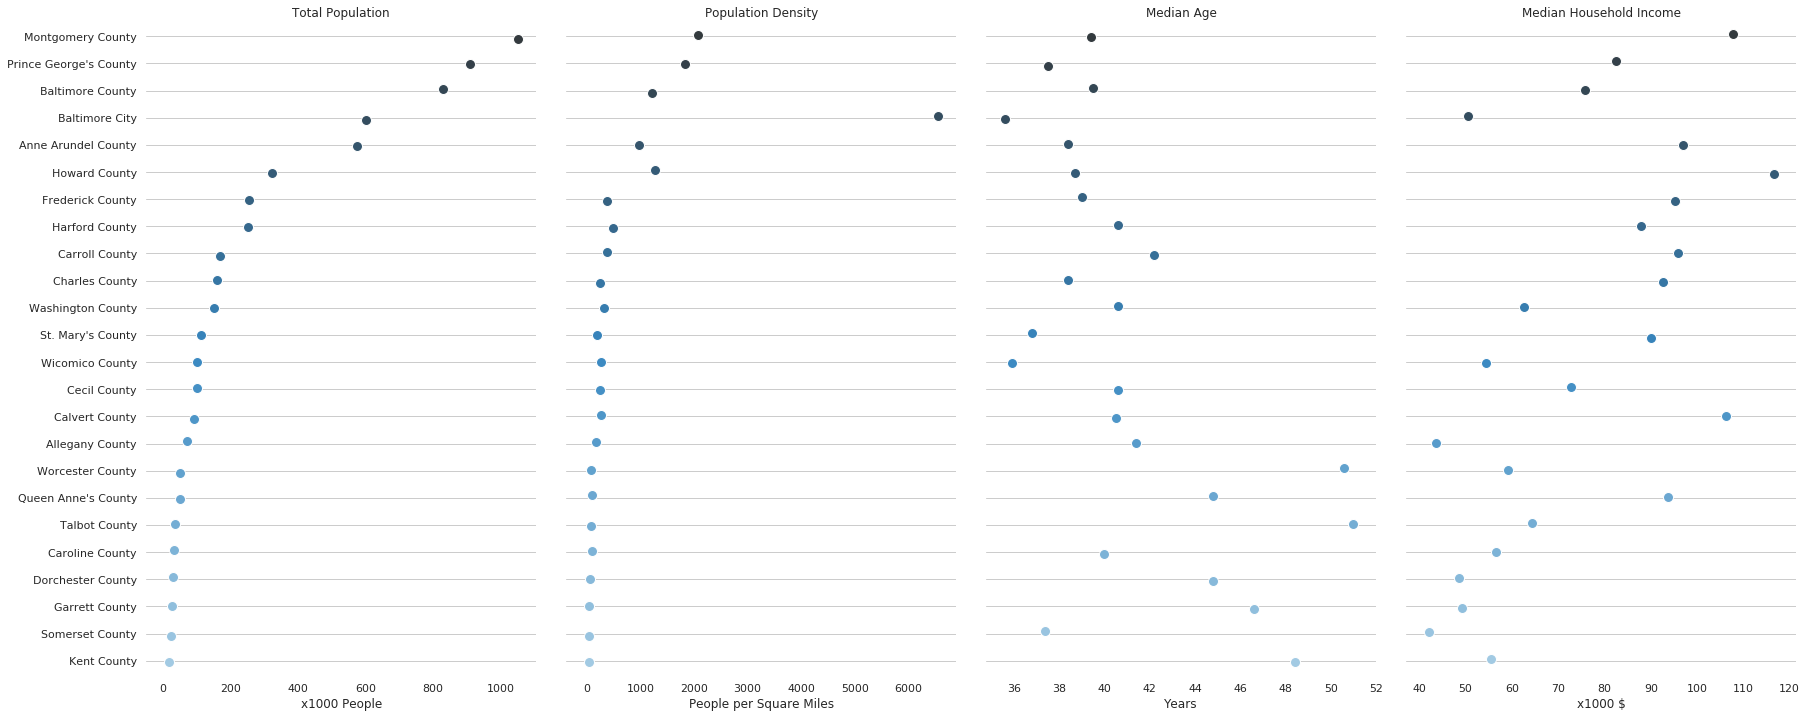

In [23]:
sns.set(style="whitegrid")

#Create reduced dataset
df_reduced_md_demo = df_complete_md[['Jurisdictions', 'Total Population', 'Population Density (People per Square Mile)', 'Median Age (Years)', 'Median Household Income ($)']]
df_reduced_md_demo[['Total Population']] = df_reduced_md_demo['Total Population']/1000
df_reduced_md_demo[['Median Household Income ($)']] = df_reduced_md_demo['Median Household Income ($)']/1000

#Make the PairGrid (source: https://seaborn.pydata.org/examples/pairgrid_dotplot.html)
g = sns.PairGrid(df_reduced_md_demo.sort_values('Total Population', ascending=False),
                 x_vars=df_reduced_md_demo.columns[1:], y_vars=['Jurisdictions'],
                 height=10, aspect=.6)

#Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",
      palette="Blues_d", linewidth=1, edgecolor="w")

#Use the same x axis limits on all columns and add better labels
g.set(ylabel="")

#Titles and x labels
titles = ['Total Population', 'Population Density', 'Median Age', 'Median Household Income']
xlabels=['x1000 People','People per Square Miles', 'Years', 'x1000 $']

for ax, title, xlabel in zip(g.axes.flat, titles, xlabels):

    # Set a different title for each axes
    ax.set(title=title, xlabel=xlabel)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

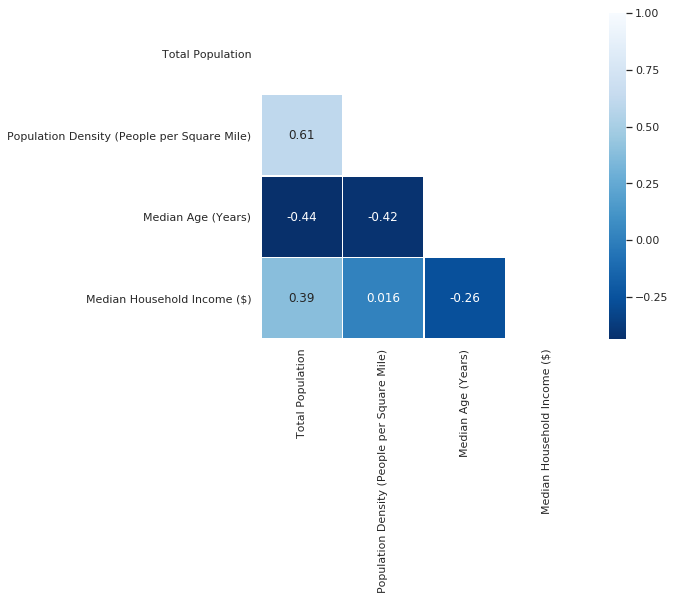

In [24]:
#Calculate Pearson correlation coefficient
pearsoncorr_reduced_md_demo = df_reduced_md_demo.drop('Jurisdictions',1).corr(method='pearson')

#Plot heatmap
mask = np.zeros_like(pearsoncorr_reduced_md_demo)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(8, 6))
plt.yticks(rotation=0)
g = sns.heatmap(pearsoncorr_reduced_md_demo, 
            mask=mask,
            xticklabels=pearsoncorr_reduced_md_demo.columns,
            yticklabels=pearsoncorr_reduced_md_demo.columns,
            cmap='Blues_r',
            square= True,
            annot=True,
            linewidth=0.5)

The difference between the make-up of the 24 counties is striking. Looking at population alone, there is a roughly 10x difference in population between the most populated county, Montgomery, and the 10 least populated ones. Additionaly, the data shows that for these 4 metrics, the difference between counties are significant, and it is hard to draw any conclusions, beyond that it appears that the most populated counties "skew" younger and "richer".

<u>Education and Employment</u>
<br>Includes the median household income, the percentage of population 25 years and older without a high school diploma, the percentage of population 25 years and older with Bachelor's Degree or higher, and the unemployment rate

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


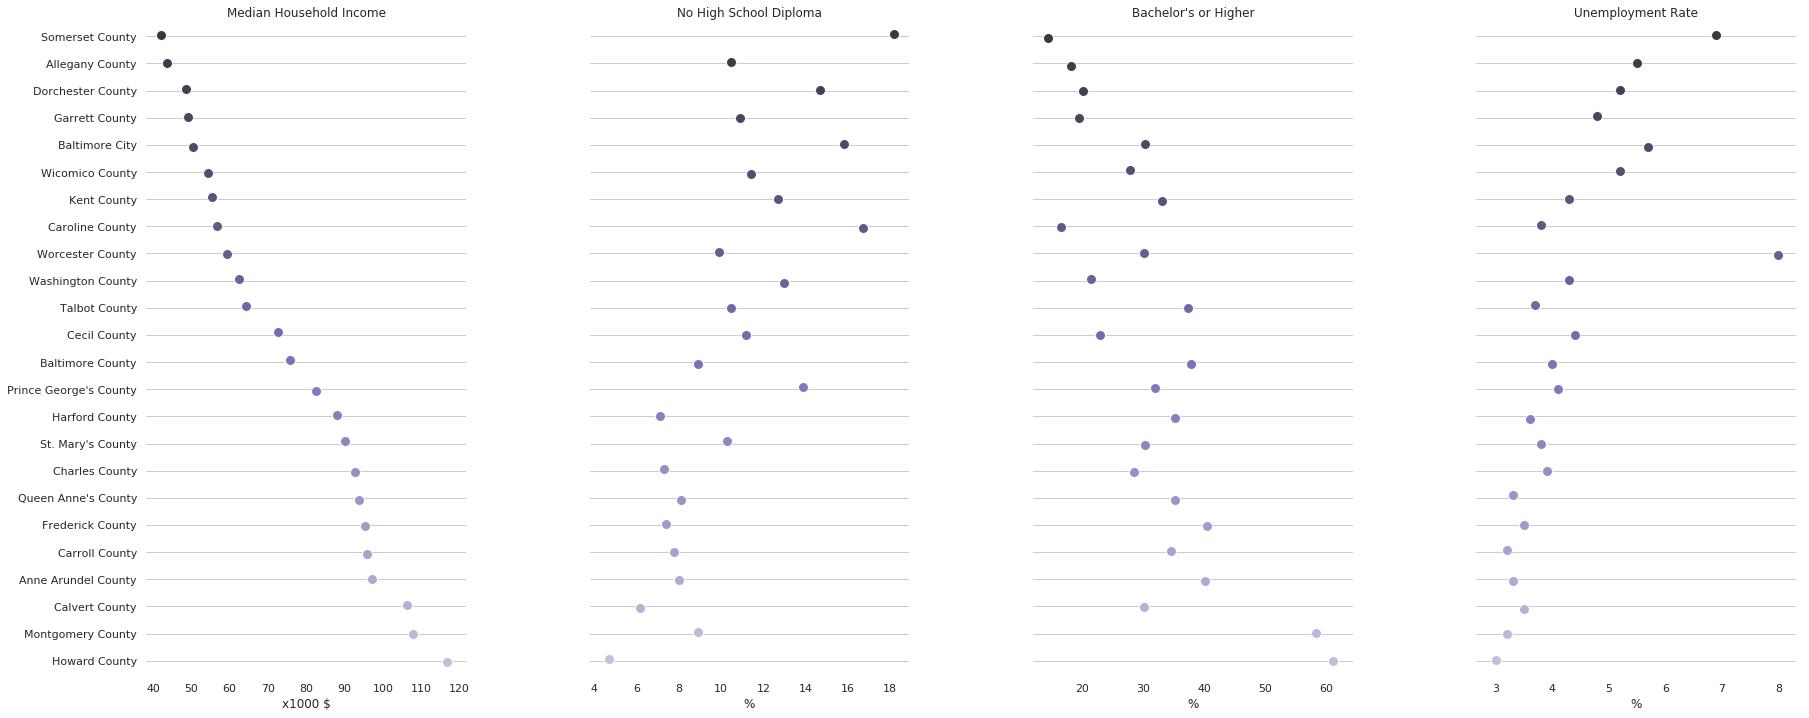

In [25]:
#Reset parameters
sns.set(style="whitegrid")

#Create reduced dataset
df_reduced_md_ed = df_complete_md[['Jurisdictions', 'Median Household Income ($)', 'Population 25 years and older without a High School Diploma (%)', 
                                   "Population 25 years and older with Bachelor's Degree or Higher (%)", 'Unemployment Rate (%)']]
df_reduced_md_ed[['Median Household Income ($)']] = df_reduced_md_ed['Median Household Income ($)']/1000



#Make the PairGrid
g1 = sns.PairGrid(df_reduced_md_ed.sort_values('Median Household Income ($)', ascending=True),
                 x_vars=df_reduced_md_ed.columns[1:], y_vars=['Jurisdictions'],
                 height=10, aspect=0.6)

#Draw a dot plot using the stripplot function
g1.map(sns.stripplot, size=10, orient="h",
      palette="Purples_d", linewidth=1, edgecolor="w")

#Use the same x axis limits on all columns and add better labels
g1.set(ylabel="")

#Titles and x labels
titles = ['Median Household Income', "No High School Diploma" , "Bachelor's or Higher", 'Unemployment Rate']
xlabels= ['x1000 $','%', '%', '%']

for ax1, title, xlabel in zip(g1.axes.flat, titles, xlabels):

    # Set a different title for each axes
    ax1.set(title=title, xlabel=xlabel)

    # Make the grid horizontal instead of vertical
    ax1.xaxis.grid(False)
    ax1.yaxis.grid(True)

sns.despine(left=True, bottom=True)

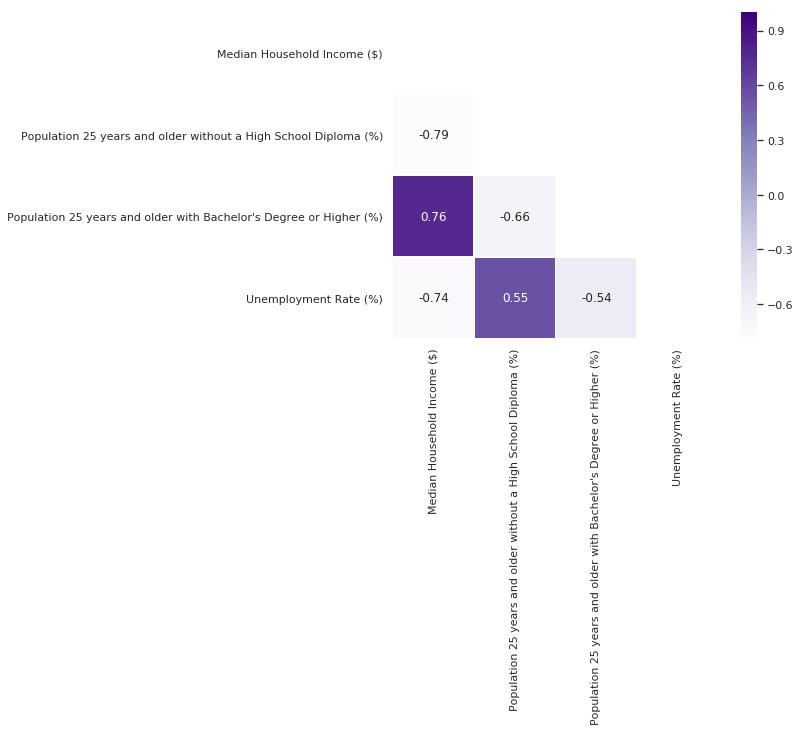

In [26]:
#Calculate Pearson correlation coefficient
pearsoncorr_reduced_md_ed = df_reduced_md_ed.drop('Jurisdictions',1).corr(method='pearson')

#Plot heatmap
mask = np.zeros_like(pearsoncorr_reduced_md_ed)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(8, 6))
plt.yticks(rotation=0)
g = sns.heatmap(pearsoncorr_reduced_md_ed, 
            mask=mask,
            xticklabels=pearsoncorr_reduced_md_ed.columns,
            yticklabels=pearsoncorr_reduced_md_ed.columns,
            cmap='Purples',
            square= True,
            annot=True,
            linewidth=0.5)

Again, the difference between counties is quite noticeable; there is a twofold difference in household income between the 3 "richest" counties, and the 10 "poorest"ones. Note that household income is strongly correlated to educational achievement and unemployemnt, and that the percentage of population over 25 years old without a high school degree and the percentage of this same population with a bachelors or higher are negatively correlated.

<u>Housing</u>
<br>Includes the median sales price of a home, the cost of living index, the ratio of median home sales price to median household income, and the number of vacant units.

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


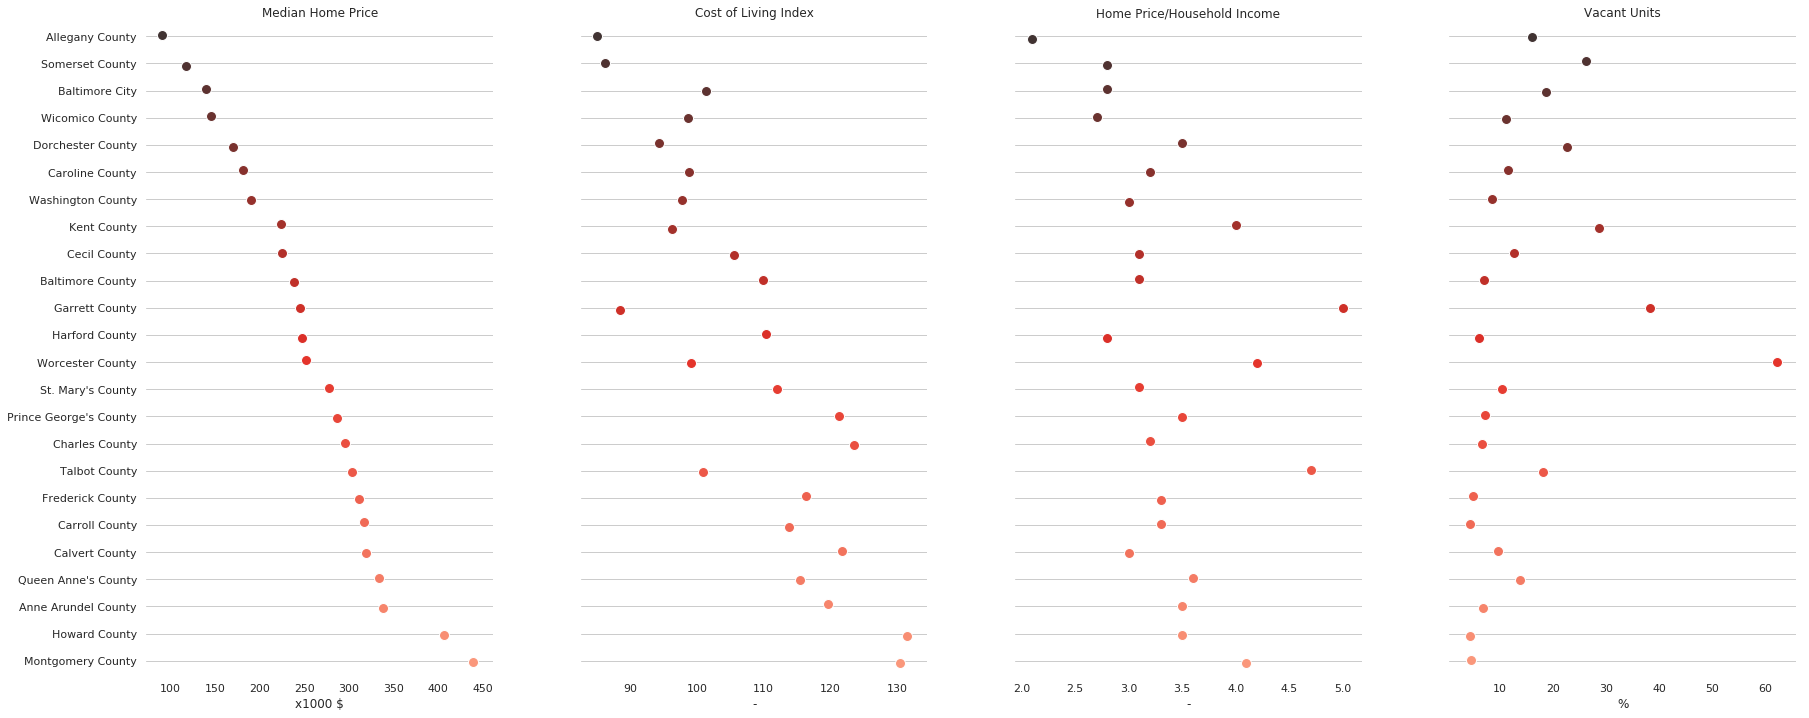

In [27]:
#Reset parameters
sns.set(style="whitegrid")

#Create reduced dataset
df_reduced_md_hous = df_complete_md[['Jurisdictions', 'Median Sale Price of a Home ($)', 'Cost of Living Index', 'Ratio of Median Housing Unit Sales Price to Median Household Income', 
                                     'Percentage of Housing Units that are Vacant']]
df_reduced_md_hous[['Median Sale Price of a Home ($)']] = df_reduced_md_hous['Median Sale Price of a Home ($)']/1000

#Make the PairGrid
g2 = sns.PairGrid(df_reduced_md_hous.sort_values('Median Sale Price of a Home ($)', ascending=True),
                 x_vars=df_reduced_md_hous.columns[1:], y_vars=['Jurisdictions'],
                 height=10, aspect=0.6)

#Draw a dot plot using the stripplot function
g2.map(sns.stripplot, size=10, orient="h",
      palette="Reds_d", linewidth=1, edgecolor="w")

#Use the same x axis limits on all columns and add better labels
g2.set(ylabel="")

#Titles and x labels
titles = ['Median Home Price', 'Cost of Living Index', 'Home Price/Household Income', 'Vacant Units']
xlabels= ['x1000 $',"-", '-', '%']

for ax2, title, xlabel in zip(g2.axes.flat, titles, xlabels):

    # Set a different title for each axes
    ax2.set(title=title, xlabel=xlabel)

    # Make the grid horizontal instead of vertical
    ax2.xaxis.grid(False)
    ax2.yaxis.grid(True)

sns.despine(left=True, bottom=True)

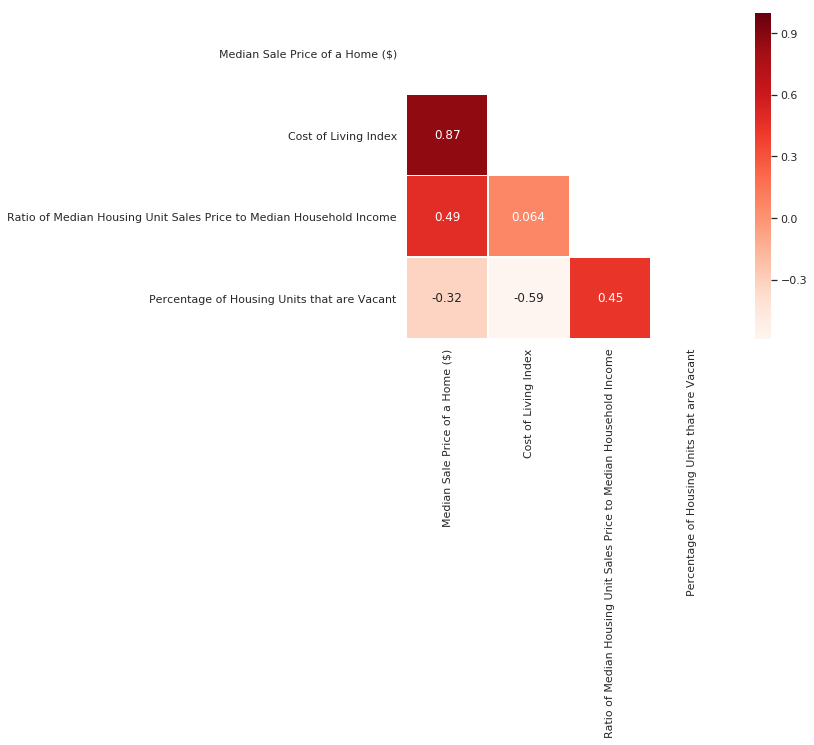

In [28]:
#Calculate Pearson correlation coefficient
pearsoncorr_reduced_md_hous = df_reduced_md_hous.drop('Jurisdictions',1).corr(method='pearson')

#Plot heatmap
mask = np.zeros_like(pearsoncorr_reduced_md_hous)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(8, 6))
plt.yticks(rotation=0)
g = sns.heatmap(pearsoncorr_reduced_md_hous, 
            mask=mask,
            xticklabels=pearsoncorr_reduced_md_hous.columns,
            yticklabels=pearsoncorr_reduced_md_hous.columns,
            cmap='Reds',
            square= True,
            annot=True,
            linewidth=0.5)

The difference in median housing unit sale price between counties is impressive, and as expect is strongly correlate to cost of living (or vice-versa). As expected, median housing price is greater in "popular" counties, i.e. counties that have very few vacant housing units. The ratio of median home price to median household income is very consitent bewteen counties, and outside of a few outliers is generally betwen 3 and 4.

<u>Hardship</u>
<br>Includes the unemployment rate, the percentage of the population 25 years and older without a college degreem the percentage of people living in poverty, and the crime rate per 100000 people.

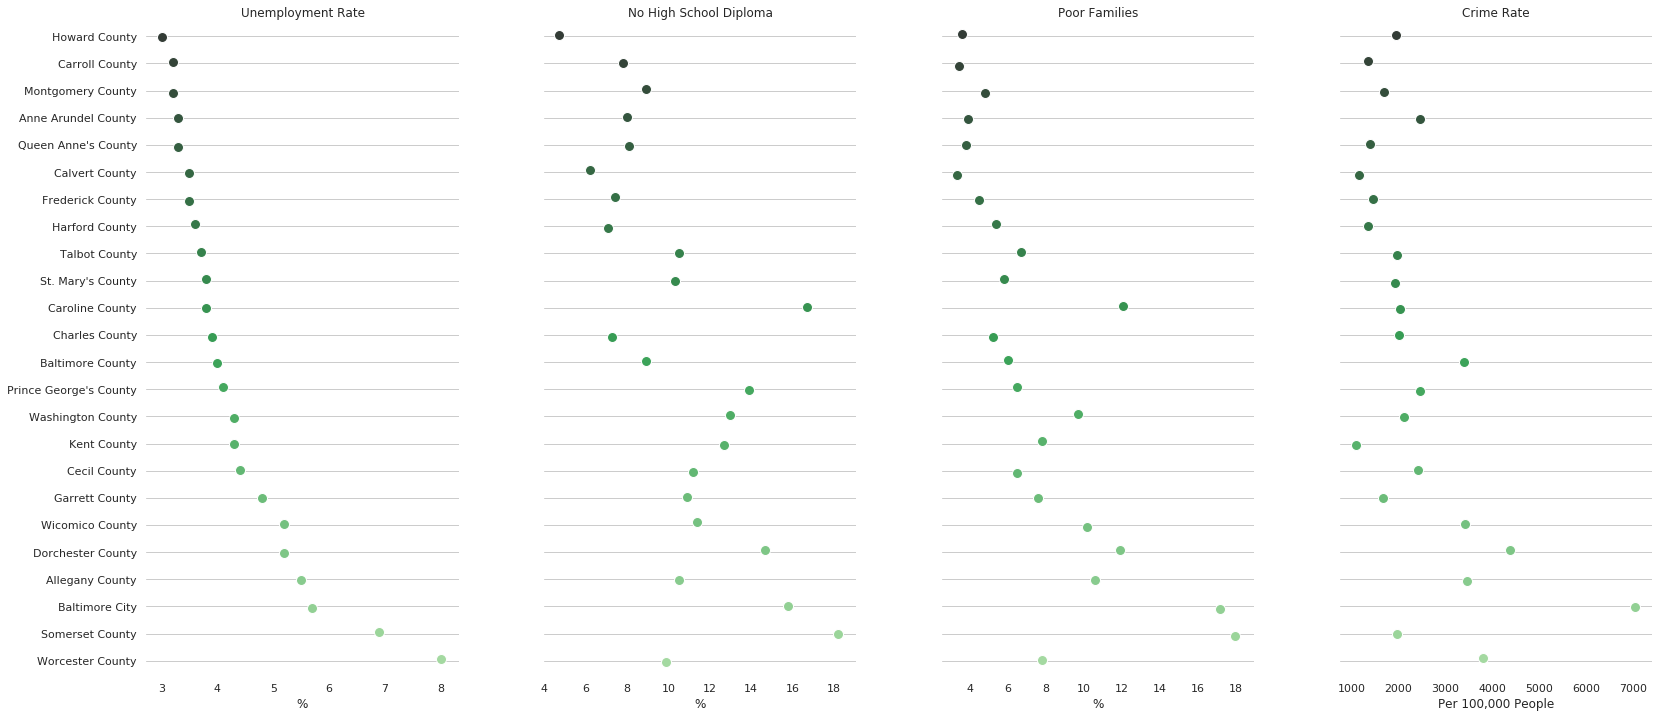

In [29]:
#Reset parameters
sns.set(style="whitegrid")

#Create reduced dataset
df_reduced_md_hard = df_complete_md[['Jurisdictions', 'Unemployment Rate (%)', 'Population 25 years and older without a High School Diploma (%)', 
                                     'Percentage of Families Living in Poverty', 'Crime Rate per 100,000 People']]

#Make the PairGrid
g3 = sns.PairGrid(df_reduced_md_hard.sort_values('Unemployment Rate (%)', ascending=True),
                 x_vars=df_reduced_md_hard.columns[1:], y_vars=['Jurisdictions'],
                 height=10, aspect=0.55)

#Draw a dot plot using the stripplot function
g3.map(sns.stripplot, size=10, orient="h",
      palette="Greens_d", linewidth=1, edgecolor="w")

#Use the same x axis limits on all columns and add better labels
g3.set(ylabel="")

#Titles and x labels
titles = ['Unemployment Rate', 'No High School Diploma', 'Poor Families', 'Crime Rate']
xlabels= ['%',"%", '%', 'Per 100,000 People']

for ax3, title, xlabel in zip(g3.axes.flat, titles, xlabels):

    # Set a different title for each axes
    ax3.set(title=title, xlabel=xlabel)

    # Make the grid horizontal instead of vertical
    ax3.xaxis.grid(False)
    ax3.yaxis.grid(True)

sns.despine(left=True, bottom=True)

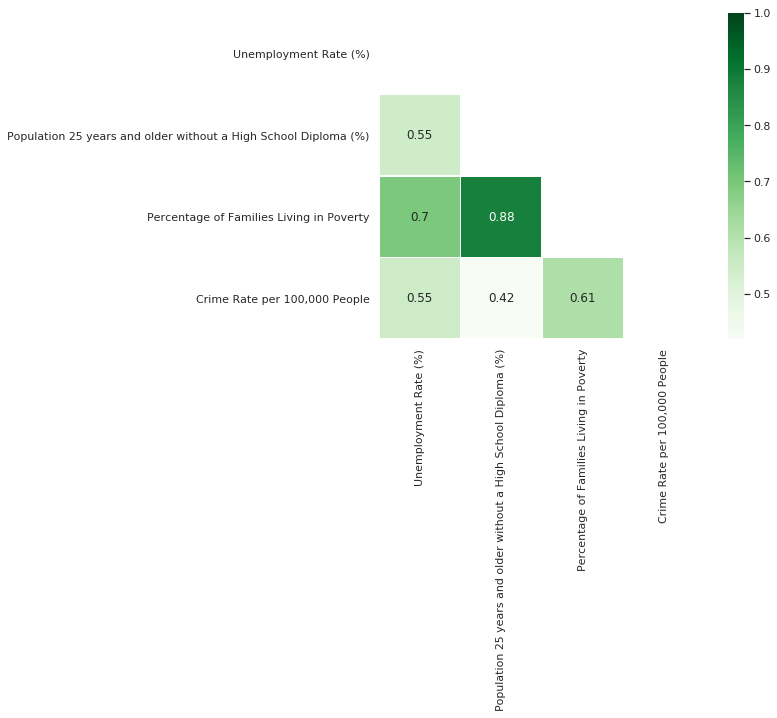

In [30]:
#Calculate Pearson correlation coefficient
pearsoncorr_reduced_md_hard = df_reduced_md_hard.drop('Jurisdictions',1).corr(method='pearson')

#Plot heatmap
mask = np.zeros_like(pearsoncorr_reduced_md_hard)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(8, 6))
plt.yticks(rotation=0)
g = sns.heatmap(pearsoncorr_reduced_md_hard, 
            mask=mask,
            xticklabels=pearsoncorr_reduced_md_hard.columns,
            yticklabels=pearsoncorr_reduced_md_hard.columns,
            cmap='Greens',
            square= True,
            annot=True,
            linewidth=0.5)

This dataset shows strong corelation between unemployement rate and the percentage of the adult population without a high school degree, as well as with the number of poor families. Crime rate seems to trend up as unemployment increases, but the signal in the data does not seem very strong.

We now have gained a better understanding of the similarities and differences between Maryland counties, and where able to visualize this information if easy to understand formats. However, the quantity of data available makes it difficult to be able to compare counties affectively, and thus we will now move to more advanced data analytics to gain more insights into this data.

### Cluster Counties

Similar counties will be clustered together, using the k-means clustering algorithm. The Folium library will be used to visualize the counties in Maryland and their emerging clusters. Based on this clustering, one can easily determine the characteristics of each county.

#### *Create Reference Dataframe*

For this analyis to be meaningfull, we need to reduce the dataset. The number of samples being low (24 counties = 24 samples), we will limit this clustering to a portion of the available data. Given the large disparity in population size, we will refrain from using absolute metrics, and will use rates, ratios, and other metrics relative to population wherever possible.

We will tackle this analysis by clustering the counties based on metrics that were deemed to be most representative of the various counties based on the exploratory data analysis, based on the exploratory data analysis performed:
- Population Density
- Median Age
- Median Household Income 
- Median Home Sales Price
- College Education
- Unemployment Rate
- Poverty Rate
- Crime Rate

In [31]:
df_reduced_clustering = df_complete_md [['Jurisdictions', 'Population Density (People per Square Mile)', 'Median Age (Years)', 'Median Household Income ($)', 'Median Sale Price of a Home ($)', 'Unemployment Rate (%)',
                                         "Population 25 years and older with Bachelor's Degree or Higher (%)", 'Percentage of Families Living in Poverty', 'Crime Rate per 100,000 People']] 
                                        
df_reduced_clustering.head()

,Jurisdictions,Population Density (People per Square Mile),Median Age (Years),Median Household Income ($),Median Sale Price of a Home ($),Unemployment Rate (%),Population 25 years and older with Bachelor's Degree or Higher (%),Percentage of Families Living in Poverty,"Crime Rate per 100,000 People"
0,Allegany County,165.0,41.4,43535.0,90829.0,5.5,18.2,10.6,3467.1
1,Anne Arundel County,980.0,38.4,97051.0,338287.0,3.3,40.1,3.9,2450.1
2,Baltimore City,6549.0,35.6,50501.0,139723.0,5.7,30.4,17.2,7033.7
3,Baltimore County,1215.0,39.5,75836.0,238426.0,4.0,37.8,6.0,3402.1
4,Calvert County,267.0,40.5,106270.0,318471.0,3.5,30.1,3.3,1155.2


#### *Find optimal k value*

To be able to cluster the counties together, we first need to determine the optimal k value buy building the clustering model and calculating the values of Inertia and Silhouette Coefficient, for k between 1 to 10. 

In [32]:
#Import necessary library
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score

#Initiate values
km_scores = []
silhouette_avg = [] 
K = range(1,10)

df_reduced_clustering_fit = df_reduced_clustering.drop('Jurisdictions', 1)
df_reduced_clustering_fit = preprocessing.MinMaxScaler().fit_transform(df_reduced_clustering_fit)

#Fit the model for k between 1 and 10
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(df_reduced_clustering_fit)
    
    cluster_labels = kmeanModel.fit_predict(df_reduced_clustering_fit)     
    
    km_scores.append(-kmeanModel.score(df_reduced_clustering_fit))
    
    if k > 1:
        silhouette_avg.append(silhouette_score(df_reduced_clustering_fit, cluster_labels))

    print(kmeanModel.labels_[0:])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 1]
[0 1 2 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0]
[1 2 3 2 2 1 2 1 2 1 2 0 2 2 0 2 2 2 1 2 0 1 1 0]
[1 0 4 0 0 1 0 0 0 1 0 3 0 2 3 2 0 0 1 0 3 1 1 3]
[1 0 3 0 0 1 0 0 0 1 0 5 0 2 5 2 0 0 1 0 5 1 1 4]
[3 0 2 0 0 3 0 0 0 3 0 1 0 4 1 4 0 0 6 0 1 3 3 5]
[1 2 7 0 2 1 2 0 0 1 2 3 2 4 3 4 0 2 5 0 3 1 1 6]
[5 8 3 1 8 6 8 1 1 5 8 2 8 4 2 4 1 8 0 1 2 6 6 7]


We can then using the different values of Inertia and the elbow method, or the Silhouette Coefficients to determine the optimal k value

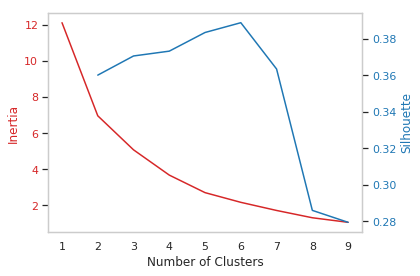

In [33]:
#Plot inertias and silhouette scores
plt.close()
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(K, km_scores, color=color)
ax1.tick_params(axis='y', labelcolor=color, left = False)
ax1.grid()

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Silhouette', color=color)
ax2.plot(K[1:], silhouette_avg, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid()

fig.tight_layout()

plt.show()

The elbow method being non-conclusive, we choose to use the silhouette coefficients, and settle on k = 6; we will then use this value moving forward

#### *Generate clusters*

We then use the **k-means algorithm** to cluster the counties into **6 clusters**.

In [34]:
#Set number of clusters
kclusters = 6

#Run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_reduced_clustering_fit)

#Check cluster labels generated for each row in the dataframe
kmeans.labels_[0:] 

array([1, 0, 3, 0, 0, 1, 0, 0, 0, 1, 0, 5, 0, 2, 5, 2, 0, 0, 1, 0, 5, 1,
       1, 4], dtype=int32)

A large number of neighborhoods are part of cluster 0; this means that the data might need to be processed differently, but let's plot it to visualize it.

#### *Visualize clusters*

First, we create a Dataframe containing the clusters that were just created

In [35]:
#Add clustering labels
df_reduced_clustering.insert(0, 'Cluster Labels', kmeans.labels_)
df_reduced_cluster_plot = df_complete_md[['Jurisdictions', 'County Seat', 'Total Population', 'Latitude','Longitude']]

#Create Dataframe
df_reduced_cluster_plot = df_reduced_cluster_plot.join(df_reduced_clustering.set_index('Jurisdictions'), on='Jurisdictions').dropna()

df_reduced_cluster_plot.head()

,Jurisdictions,County Seat,Total Population,Latitude,Longitude,Cluster Labels,Population Density (People per Square Mile),Median Age (Years),Median Household Income ($),Median Sale Price of a Home ($),Unemployment Rate (%),Population 25 years and older with Bachelor's Degree or Higher (%),Percentage of Families Living in Poverty,"Crime Rate per 100,000 People"
0,Allegany County,Cumberland,70975.0,39.652650,-78.762383,1,165.0,41.4,43535.0,90829.0,5.5,18.2,10.6,3467.1
1,Anne Arundel County,Annapolis,576031.0,38.978640,-76.492786,0,980.0,38.4,97051.0,338287.0,3.3,40.1,3.9,2450.1
2,Baltimore City,Baltimore City,602495.0,39.290882,-76.610759,3,6549.0,35.6,50501.0,139723.0,5.7,30.4,17.2,7033.7
3,Baltimore County,Towson,828431.0,39.401855,-76.602388,0,1215.0,39.5,75836.0,238426.0,4.0,37.8,6.0,3402.1
4,Calvert County,Prince Frederick,92003.0,38.540554,-76.583507,0,267.0,40.5,106270.0,318471.0,3.5,30.1,3.3,1155.2


Then, we visualize the resulting clusters

In [36]:
#Create map
map_maryland_clusters = folium.Map(width=1000,height=650, location=[CENTER_lat, CENTER_long], tiles='cartodbpositron', zoom_start=8)

#Set color scheme for the clusters
clr_options = ['red', 'blue', 'green', 'gray', 'beige', 'purple']

#Add markers to map
for lat, lng, county, seat, cluster in zip(df_reduced_cluster_plot['Latitude'], df_reduced_cluster_plot['Longitude'], df_reduced_cluster_plot['Jurisdictions'], df_reduced_cluster_plot['County Seat'], 
                                           df_reduced_cluster_plot['Cluster Labels']): 
    label = 'Cluster: {} | County: {} | County Seat: {}'.format(cluster, county, seat)
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
        [lat, lng],
        popup=label,
        tooltip = "Click for detailed information",
        icon=folium.Icon(color=clr_options[int(cluster)]),
        parse_html=False).add_to(map_maryland_clusters)  

#Add county outline
streaming_body_1 = client_e537024ca2384e43a7086e73398ff0e5.get_object(Bucket='courseracapstone-donotdelete-pr-wwxknnjptjzhai', Key='MDCnts.geojson')['Body']
county_geojson = json.load(streaming_body_1)    
    
style = {'fillColor': '#B2B2B2', 'color': '#B2B2B2', 'weight': 1}

folium.GeoJson(
    county_geojson,
    name='County Limits',
    style_function=lambda x: style).add_to(map_maryland_clusters)

folium.LayerControl().add_to(map_maryland_clusters)        
    
map_maryland_clusters

As expected, a large number of neighborhoods fall within the first cluster (label 0). It also appears that there are two "outliers", Baltimore City, and Worcester County.

# Results and Discussion <a name="results"></a>

In order to analyze these results, we first need to these clusters were "built". 

Let's first explore these clusters a bit deeper.

#### *Explore clusters*

Let's examine each cluster and determine the discriminating venue categories that distinguish each one.

In [37]:
df_reduced_cluster_analysis = df_reduced_cluster_plot.drop(['Jurisdictions', 'Latitude', 'Longitude', 'Total Population'], 1)
df_reduced_cluster_analysis.groupby('Cluster Labels')['County Seat'].count()

Cluster Labels
0    11
1     6
2     2
3     1
4     1
5     3
Name: County Seat, dtype: int64

As previously mentioned, there are two "outliers", cluster 3 (Baltimore City), and cluster 4 (Worcester County); additionally, more than 45% of counties are part of cluster 0.

Let's further dive in the data by looking at the average values per cluster for each metric used for clustering, sorted by median household income.

In [38]:
df_reduced_cluster_analysis.groupby('Cluster Labels').mean().sort_values('Median Household Income ($)', ascending = False)

,Population Density (People per Square Mile),Median Age (Years),Median Household Income ($),Median Sale Price of a Home ($),Unemployment Rate (%),Population 25 years and older with Bachelor's Degree or Higher (%),Percentage of Families Living in Poverty,"Crime Rate per 100,000 People"
Cluster Labels,,,,,,,,
2,1674.000000,39.050000,112238.500000,422569.000000,3.100000,59.750000,4.200000,1820.300000
0,573.272727,39.845455,89980.272727,289852.636364,3.690909,33.400000,4.936364,1945.954545
4,75.000000,50.600000,59266.000000,251338.000000,8.000000,30.100000,7.800000,3793.200000
5,56.333333,48.666667,56302.000000,257610.000000,4.266667,30.066667,7.366667,1579.500000
1,158.000000,40.016667,51301.833333,149217.333333,5.150000,19.766667,12.083333,2896.383333
3,6549.000000,35.600000,50501.000000,139723.000000,5.700000,30.400000,17.200000,7033.700000


This table, combined with the map plotted earlier, paints a clear picture of why the clusters were built as such. More specifically:
- Cluster 0: Upper middle class suburban counties around Baltimore and along the Baltimore-Washington parkway
- Cluster 1: Rural working class counties with lower educational achievement, double digit poverty rates, and above average crime rates
- Cluster 2: Densily populated and wealthy DC and Baltimore suburban counties with very high educational achievemnet, low crime, and above average housing prices
- Cluster 3: Baltimore City; very densily populated, with high crime and poverty rates, and low housing prices and income
- Cluster 4: "Retirement" coastal county, with older population, and above average crime rate most likely due to the tourism economy
- Cluster 5: "Retirement" rural counties, with older population, low population density, but lowest crime rate and average housing prices

We can also look at standard deviation data to ensure the data within each cluster does not vary significantly

In [39]:
df_reduced_cluster_analysis.groupby('Cluster Labels').std()

,Population Density (People per Square Mile),Median Age (Years),Median Household Income ($),Median Sale Price of a Home ($),Unemployment Rate (%),Population 25 years and older with Bachelor's Degree or Higher (%),Percentage of Families Living in Poverty,"Crime Rate per 100,000 People"
Cluster Labels,,,,,,,,
0,539.671028,2.268199,9785.790965,38821.755579,0.380669,5.265548,1.210184,689.520390
1,112.550433,3.128205,7949.573156,38852.310174,1.070981,4.667619,3.048552,998.979929
2,568.513852,0.494975,6336.383866,22559.534747,0.141421,2.050610,0.848528,185.120555
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,18.823744,2.212088,7579.782912,41361.257198,0.550757,9.304479,0.585947,443.535309


Standard deviation data shows that with the exeption of population density, the standard deviation for each parameter within each cluster is acceptable.

Finally, let's look at the total population per cluster

In [40]:
sum_tot = df_reduced_cluster_plot.groupby('Cluster Labels').sum()
sum_tot['Total Population']

Cluster Labels
0    3511050.0
1     416073.0
2    1375763.0
3     602495.0
4      51823.0
5      85514.0
Name: Total Population, dtype: float64

One can see that more than 75% of the state's population is "contained"within clusters 0 and 2. Given that they are the wealthiest counties, one can easily understand what makes Maryland the richest state using median household income as basis.

#### *Final Visualization*

To wrap up, we can generate an interactive Choropleth map with the counties shaded in colors based on their clusters.

First, we need to append the GeoJSON file to be able to pull up more data within tooltips

In [41]:
#Append GeoJSON file to add some additional parameters
county_geojson_final = copy.deepcopy(county_geojson)

for i in range(len(df_reduced_cluster_plot)):
    County = df_reduced_cluster_plot['Jurisdictions'][i]
    County_Seat = df_reduced_cluster_plot['County Seat'][i]
    County_Label = df_reduced_cluster_plot['Cluster Labels'][i]    
    County_Pop = df_reduced_cluster_plot['Total Population'][i]
    County_Dens = df_reduced_cluster_plot['Population Density (People per Square Mile)'][i]
    County_Age = df_reduced_cluster_plot['Median Age (Years)'][i]
    County_Income = df_reduced_cluster_plot['Median Household Income ($)'][i]
    County_Housing = df_reduced_cluster_plot['Median Sale Price of a Home ($)'][i]
    County_Unemp = df_reduced_cluster_plot['Unemployment Rate (%)'][i]
    County_Bach = df_reduced_cluster_plot["Population 25 years and older with Bachelor's Degree or Higher (%)"][i]
    County_Pov = df_reduced_cluster_plot['Percentage of Families Living in Poverty'][i]
    County_Crime = df_reduced_cluster_plot['Crime Rate per 100,000 People'][i]    
    
    for k in range(len(df_complete_md)): 
        if county_geojson_final['features'][k]['properties']['geodesc'] == County: 
            county_geojson_final['features'][k]['properties']['seat'] = County_Seat
            county_geojson_final['features'][k]['properties']['label'] = int(County_Label)
            county_geojson_final['features'][k]['properties']['pop'] = County_Pop
            county_geojson_final['features'][k]['properties']['dens'] = County_Dens
            county_geojson_final['features'][k]['properties']['age'] = County_Age
            county_geojson_final['features'][k]['properties']['income'] = County_Income
            county_geojson_final['features'][k]['properties']['housing'] = County_Housing
            county_geojson_final['features'][k]['properties']['unemp'] = County_Unemp
            county_geojson_final['features'][k]['properties']['bach'] = County_Bach
            county_geojson_final['features'][k]['properties']['pov'] = County_Pov            
            county_geojson_final['features'][k]['properties']['crime'] = County_Crime         

We are now ready to creat the final visualization

In [42]:
#Import necessary libraries to create colormap
import branca.colormap as cm
cluster_count_colormap = cm.StepColormap(colors=['#b2182b','#ef8a62','#fddbc7','#d1e5f0','#67a9cf','#2166ac'], vmin=min(df_reduced_cluster_analysis['Cluster Labels']), 
                                         vmax=max(df_reduced_cluster_analysis['Cluster Labels']))
    
final_cluster_map = folium.Map(width=1000,height=650, location=[CENTER_lat, CENTER_long], tiles='cartodbpositron', zoom_start=8, control_scale=True)

style_function1 = lambda x: {
    'fillColor': cluster_count_colormap(x['properties']['label']),
    'color': 'black',
    'weight': 1,
    'fillOpacity': 0.6
}

highlight_function1 = lambda x: {
    'fillColor': cluster_count_colormap(x['properties']['label']),
    'color': 'black',
    'weight': 1,
    'fillOpacity': 1
}

folium.GeoJson(
    county_geojson_final,
    style_function=style_function1,
    highlight_function = highlight_function1,
    tooltip=folium.features.GeoJsonTooltip(
        fields=['label', 'geodesc', 'seat','pop','dens','age', 'income','housing', 'bach', 'unemp', 'pov', 'crime'],
        aliases=['Cluster: ', 'County: ', 'County Seat: ', 'Total Population: ', 'Population Density (People per Square Miles): ', 'Median Age (Years): ', 'Median Household Income ($): ', 'Median Home Sales Price ($): ', 
                'College Achievement (%): ', 'Unemployment Rate (%): ', 'Poverty Rate (%): ', 'Crime Rate (Per 100,000 People): '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;"))
).add_to(final_cluster_map)

#Add labels
folium.map.CustomPane('labels').add_to(final_cluster_map)
folium.TileLayer('CartoDBPositronOnlyLabels',
                 pane='labels').add_to(final_cluster_map)

#Add categorical legend (source: https://jingwen-z.github.io/how-to-draw-a-map-with-folium-module-in-python/)
from branca.element import Template, MacroElement
template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; top: 20px;'>
     
<div class='legend-title'>Clusters</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:#b2182b;opacity:0.6;'></span>0 - Upper Middle Class</li>
    <li><span style='background:#ef8a62;opacity:0.6;'></span>1 - Working Class</li>
    <li><span style='background:#fddbc7;opacity:0.6;'></span>2 - Wealthy</li>
    <li><span style='background:#d1e5f0;opacity:0.6;'></span>3 - Baltimore City</li>
    <li><span style='background:#67a9cf;opacity:0.6;'></span>4 - Coastal Communities</li>
    <li><span style='background:#2166ac;opacity:0.6;'></span>5 - Rural and Retired</li>
  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

final_cluster_map.get_root().add_child(macro)

final_cluster_map

#### *Summary*

After parsing through numerous datasets, we reduced our analysis to the following key metrics:
- Population Density
- Median Age
- Median Household Income 
- Median Home Sales Price
- College Education
- Unemployment Rate
- Poverty Rate
- Crime Rate

Using these metrics, our analysis showed that the Maryland counties can clustered into 6 different groups. Note that 2 of these clusters have only one element, and thus are considered outliers, despite representing over 10% of the State's population. The population in the remaining 4 clusters can be described as follows:
- Suburban, wealthy and highly-educated
- Suburban, upper middle class
- Rural, working class
- Rural, older/retired 

As mentioned in the introduction, Maryland is the richest State in the Union, using median household income as a metric, and this analysis clearly supports it. Indeed, more than 75% of the population is classified as either wealthy or upper middle class (on a cluster basis). However, this analysis also shows that the struggles of Baltimore City residents are real, and that the opportunities for working class folks to live and work close to population centers might be very limited.

# Conclusions <a name="conclusion"></a>

In this workbook, we succesfully:
- Compiled and explored data on Maryland Counties
- Sorted the counties and clustered them using the k-means algorithm
- Displayed the clusters and counties on an interactive map

The stated objective of this work was to learn more about the State of Maryland through the make-up of its various counties, and this objective was achieved. The analysis revealed that a large majority of the counties are doing well overall, but the struggle of a minority of the counties, namely Baltimore City and rural, working class counties are real.

More granularity in the data would most likely prove to be more insightful, and would paint a picture of inequality even in counties that are deemed well-off. An option could be to repeat a similar analysis using ZIP Codes instead of counties; a quick Google search revealed that Maryland has around 600 ZIP Codes [[15](#ref15)], which would provide a very significant increase in sample size and thus a greater ability to discovery more insights in the data.

# References <a name="references"></a>

[1<a name="ref1"></a>] https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population

[2<a name="ref2"></a>] https://en.wikipedia.org/wiki/Maryland

[3<a name="ref3"></a>] https://en.wikipedia.org/wiki/Annapolis,_Maryland

[4<a name="ref4"></a>] https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_income

[5<a name="ref5"></a>] https://doit.maryland.gov/support/Pages/open-data-portal.aspx

[6<a name="ref6"></a>] https://opendata.maryland.gov/Demographic/Maryland-Counties-Socioeconomic-Characteristics/is7h-kp6x

[7<a name="ref7"></a>] https://opendata.maryland.gov/Demographic/Choose-Maryland-Compare-Counties-Demographics/pa7d-u6hs

[8<a name="ref8"></a>] https://opendata.maryland.gov/Housing/Choose-Maryland-Compare-Counties-Quality-Of-Life/dyym-bjv4

[9<a name="ref9"></a>] https://opendata.maryland.gov/Education/Choose-Maryland-Compare-Counties-Education/63pe-mygy

[10<a name="ref10"></a>] https://opendata.maryland.gov/Business-and-Economy/Choose-Maryland-Compare-Counties-Workforce/q7q7-usgm

[11<a name="ref11"></a>] https://opendata.maryland.gov/Public-Safety/Violent-Crime-Property-Crime-by-County-1975-to-Pre/jwfa-fdxs

[12<a name="ref12"></a>] https://en.wikipedia.org/wiki/List_of_counties_in_Maryland

[13<a name="ref13"></a>] https://opendata.maryland.gov/Administrative/Maryland-Counties/g8er-va3s

[14<a name="ref14"></a>] https://www.coursera.org/learn/applied-data-science-capstone/discussions/weeks/5/threads/OwNJTEq6TBiDSUxKunwYLw

[15<a name="ref15"></a>] https://data.mongabay.com/igapo/zip_codes/MD.htm